In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
file_name = input(" Enter CSV file name (e.g., gld_pricee_data.csv): ")

try:
    data = pd.read_csv(file_name)
    print(" File loaded successfully!")
except FileNotFoundError:
    print(" File not found. Please check the name and try again.")


📂 Enter CSV file name (e.g., gld_pricee_data.csv):  Social_Network_Ads.csv


✅ File loaded successfully!


In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [5]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [7]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_data.corr()

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


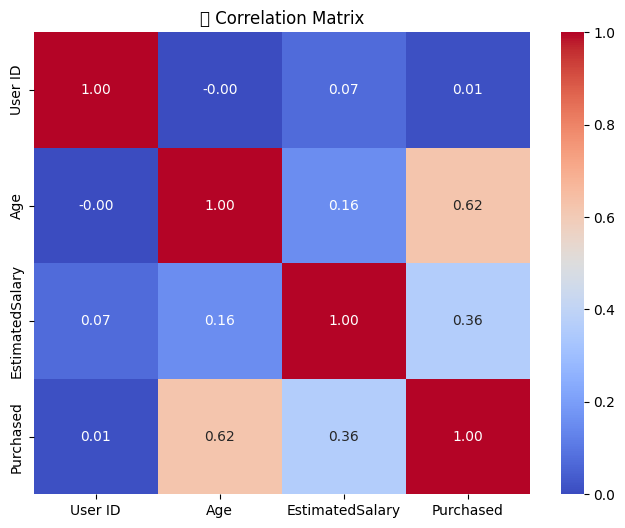

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title(" Correlation Matrix")
plt.show()

In [14]:
print(" Available Columns:", list(data.columns))
target_column = input(" Enter the target column name (e.g., 'GLD', 'Close'): ")
if target_column not in data.columns:
    raise ValueError(f" Column '{target_column}' not found in the dataset!")

📊 Available Columns: ['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']


🎯 Enter the target column name (e.g., 'GLD', 'Close'):  Gender


In [22]:
X = data.drop(columns=['Date', target_column], errors='ignore')
X = pd.get_dummies(X)
if Y.dtype == 'object' or Y.dtype == 'bool':
    le = LabelEncoder()
    Y = le.fit_transform(Y)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
print("Select a Regression Model:\n"
      "1. Linear Regression\n"
      "2. Ridge Regression\n"
      "3. Lasso Regression\n"
      "4. Support Vector Regression (SVR)\n"
      "5. Decision Tree Regressor\n"
      "6. Random Forest Regressor\n"
      "7. Gradient Boosting Regressor")
choice = input("Enter model number (1–7): ").strip()

Select a Regression Model:
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Support Vector Regression (SVR)
5. Decision Tree Regressor
6. Random Forest Regressor
7. Gradient Boosting Regressor


Enter model number (1–7):  3


In [25]:
if choice == '1':
    model = LinearRegression()
elif choice == '2':
    model = Ridge()
elif choice == '3':
    model = Lasso()
elif choice == '4':
    model = SVR()
elif choice == '5':
    model = DecisionTreeRegressor()
elif choice == '6':
    model = RandomForestRegressor(n_estimators=100, random_state=2)
elif choice == '7':
    model = GradientBoostingRegressor()
else:
    print(" Invalid choice. Defaulting to Linear Regression.")
    model = LinearRegression()

print(f" Model selected: {model.__class__.__name__}")

 Model selected: Lasso


In [26]:
model.fit(X_train, Y_train)
print("✅ Model training completed.")

✅ Model training completed.


In [27]:
Y_pred = model.predict(X_test)
print(f"\n📊 Evaluation for {model.__class__.__name__}:")
print("R² Score :", round(r2_score(Y_test, Y_pred), 4))
print("MAE      :", round(mean_absolute_error(Y_test, Y_pred), 4))
print("MSE      :", round(mean_squared_error(Y_test, Y_pred), 4))
print("RMSE     :", round(mean_squared_error(Y_test, Y_pred)**0.5, 4))


📊 Evaluation for Lasso:
R² Score : 0.01
MAE      : 0.4971
MSE      : 0.2475
RMSE     : 0.4975


C:\Users\Dell\AppData\Local\Temp\ipykernel_2080\2584010057.py:9: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


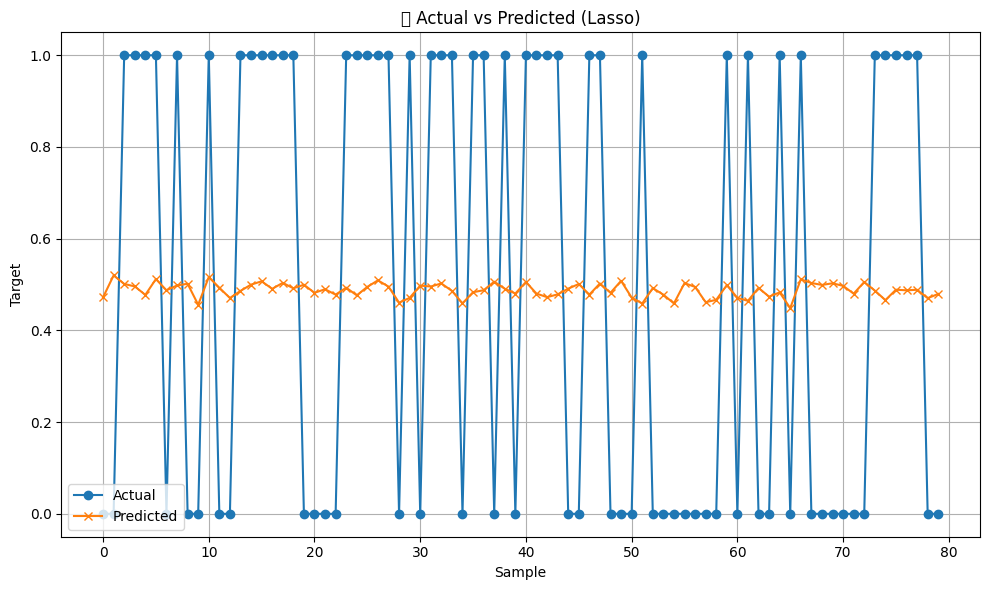

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(list(Y_test)[:100], label='Actual', marker='o')
plt.plot(list(Y_pred)[:100], label='Predicted', marker='x')
plt.title(f"📉 Actual vs Predicted ({model.__class__.__name__})")
plt.xlabel("Sample")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.tight_layout()